In [1]:
import os
import struct 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist

## Load and Generate the Dataset for Regression

In [71]:
#define a function to generate bags consisting of images with digit 0 and digit 7
def generate_bag():
    #load the training and testing dataset
    (X_train_org, y_train_org), (X_test_org, y_test_org) = mnist.load_data()
    #print(X_train_org.shape)
    #generate a dataset with all zeros and sevens for training set
    X_train_0 = X_train_org[y_train_org == 0]
    y_train_0 = y_train_org[y_train_org == 0]#np.zeros(len(X_train_0))
    X_train_7 = X_train_org[y_train_org == 7]
    y_train_7 = y_train_org[y_train_org == 7]
    #generate a dataset with all zeros and sevens for testing set
    X_test_0 = X_test_org[y_test_org == 0]
    y_test_0 = y_test_org[y_test_org == 0]#np.zeros(len(X_train_0))
    X_test_7 = X_test_org[y_test_org == 7]
    y_test_7 = y_test_org[y_test_org == 7]
    
    #combine the two datasets for training set
    X_train_new = np.append(X_train_0, X_train_7, axis = 0)
    y_train_new = np.append(y_train_0, y_train_7)
    #combine the two datasets for testing set
    X_test_new = np.append(X_test_0, X_test_7, axis = 0)
    y_test_new = np.append(y_test_0, y_test_7)
    print(X_train_new.shape)
    print(y_train_new.shape)
    
    #shuffle the datasets for training set
#     combination = np.column_stack((X_train_new,y_train_new))
#     np.random.shuffle(combination)
#     X_train = combination[:, :-1]  
#     y_train = combination[:, -1] 
#     #shuffle the datasets for training set
#     combination2 = np.column_stack((X_test_new,y_test_new))
#     np.random.shuffle(combination2)
#     X_test = combination2[:, :-1]  
#     y_test = combination2[:, -1] 
    
    #return the training and testing datasets
    return X_train_new, y_train_new, X_test_new, y_test_new

In [84]:
#Generate the training and testing sets
X_train, y_train, X_test, y_test = generate_bag()

(12188, 28, 28)
(12188,)


In [85]:
#plot out 100 of the dataset function
def plot100(X_train):
    fig, ax = plt.subplots(nrows = 10, ncols = 10, sharex = True, sharey = True)
    ax = ax.flatten()
    for i in range(0, 100):
        image = X_train[i].reshape(28, 28)
        ax[i].imshow(image, cmap = 'Greys', interpolation = 'nearest')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    #show the plot
    plt.show()

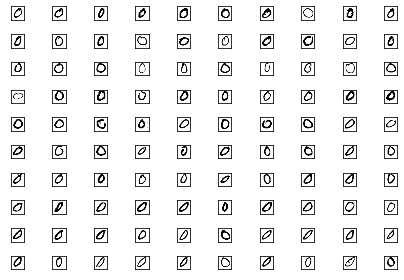

In [86]:
#plot out 100 of the dataset
plot100(X_train)

## Generate the Neural Network

In [87]:
#import of the dataset
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [88]:
X_train.shape

(12188, 28, 28)

In [103]:
#create original model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

SyntaxError: invalid syntax (<ipython-input-103-c1b02d0a87ef>, line 6)

In [102]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test))

Epoch 1/100


ValueError: in user code:

    File "D:\Python\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "D:\Python\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Python\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "D:\Python\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "D:\Python\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\Python\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "D:\Python\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "D:\Python\lib\site-packages\keras\losses.py", line 1807, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "D:\Python\lib\site-packages\keras\backend.py", line 5158, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 26, 26, 32) vs (None,)).
